<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Takeo_Assignment_Bangaluru_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is a crucial step in the data preprocessing process. It helps you understand your dataset, identify patterns, anomalies, and make informed decisions about data cleaning and feature engineering. Here's a is a task of EDA using Bangaluru House Price:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bengaluru_house_prices.csv to bengaluru_house_prices.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
# Load your dataset
df = pd.read_csv(filename)


In [5]:
# 1. Get a quick overview of the data
df.head() # Display the first few rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.info()  # Display data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe() # Summary statistics

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

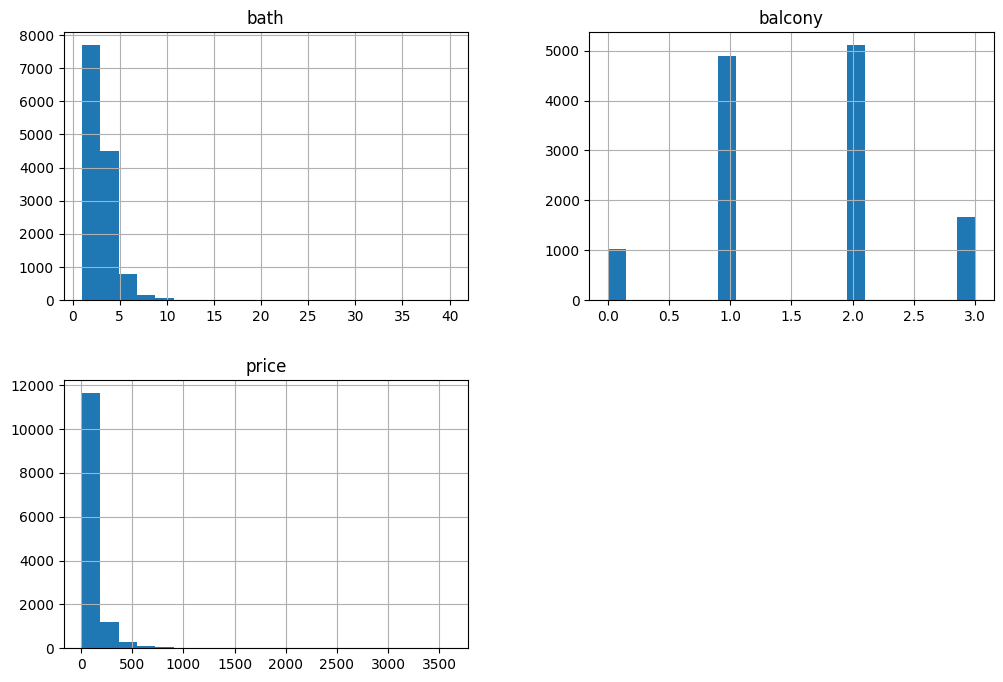

In [10]:
# 2. Data Visualization
# - Histograms for numerical variables
df.hist(bins=20, figsize=(12, 8))
plt.show()

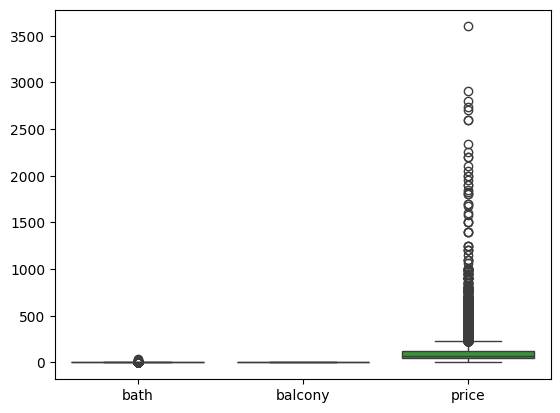

In [11]:
  # - Box plots for numerical variables
sns.boxplot(data=df, orient= 'v')
plt.show()

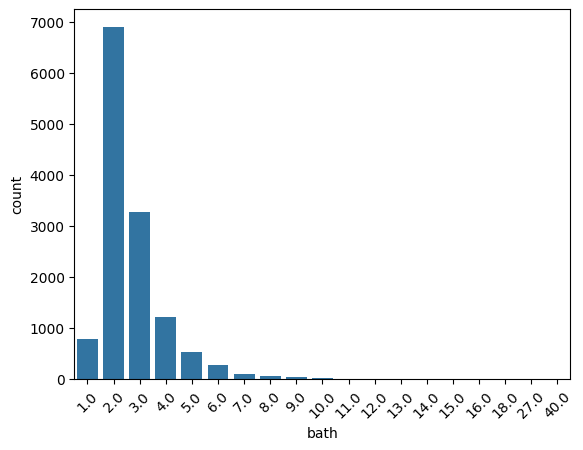

In [12]:
#Countplots for Categorical Variables
sns.countplot(x='bath', data=df)
plt.xticks(rotation=45)
plt.show()

In [13]:
#Handling Missing Values
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
550200/13320

41.306306306306304

In [15]:
#This column missing its 40% of it's value

In [16]:
#impute missing values bath
mean_bath = df['bath'].mean()
df['bath'].fillna(mean_bath, inplace=True)

In [17]:
#impute missing values for balcony
mean_balcony = df['balcony'].mean()
df['balcony'].fillna(mean_balcony, inplace=True)

In [18]:
# drop rows with missing values in the size column
df.dropna(subset=['size'], inplace=True)
df.dropna(subset=['location'], inplace=True)

In [19]:
# drop a column named 'society' because it has a huge missing value about 40%
df.drop(columns=['society'], inplace=True)

In [20]:
# check the null value again
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [21]:
# Identify and handle outliers using techniques like Z-scores or IQR
from scipy import stats
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[float, int]).columns
# Exclude non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_columns)
z_scores = np.abs(stats.zscore(numeric_df))
outliers = (z_scores > 3).all(axis=1)
cleaned_df  = df[~outliers]

In [22]:
numeric_df.head(3)

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00


In [23]:
df.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [24]:
non_numeric_columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   size          13303 non-null  object 
 4   total_sqft    13303 non-null  object 
 5   bath          13303 non-null  float64
 6   balcony       13303 non-null  float64
 7   price         13303 non-null  float64
dtypes: float64(3), object(5)
memory usage: 935.4+ KB


<ipython-input-26-a7b02f1e6548>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr()


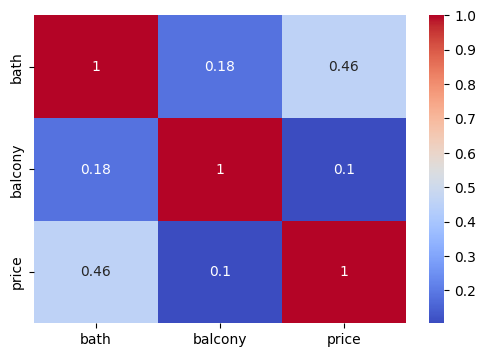

In [26]:
#Calculate the correlation matrix and visualize it
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

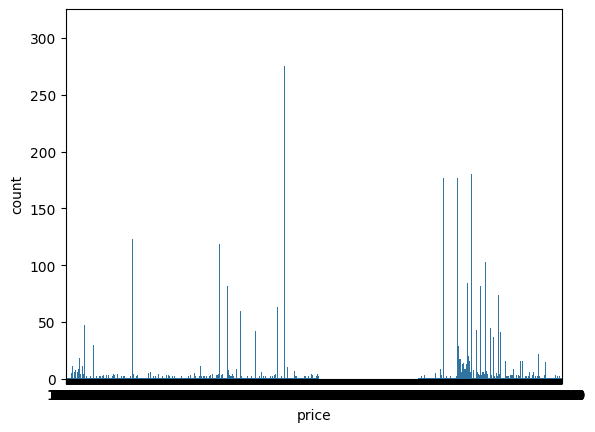

In [27]:
# Check if the target variable is balanced
sns.countplot(x='price', data=cleaned_df)
plt.show()


In [33]:
cleaned_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [40]:
cleaned_df['area_type'].unique().sum()

'Super built-up  AreaPlot  AreaBuilt-up  AreaCarpet  Area'

In [56]:
cleaned_df['bath'].unique()

array([ 2.        ,  5.        ,  3.        ,  4.        ,  6.        ,
        1.        ,  9.        ,  2.69260965,  8.        ,  7.        ,
       11.        , 10.        , 14.        , 27.        , 12.        ,
       16.        , 40.        , 15.        , 13.        , 18.        ])

In [53]:
cleaned_df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [52]:
# Calculate the frequency of each unique value in the specified column
value_counts = cleaned_df['area_type'].value_counts()

# Display the frequency counts
print(value_counts)


Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64


In [57]:
# - Encode categorical variables (e.g., one-hot encoding)
df_ban = pd.get_dummies(cleaned_df, columns=['area_type'])

In [61]:
# Reorder columns to place encoded categorical columns first
columns = list(df_ban.columns)
encoded_categorical_columns = [col for col in columns if col.startswith('area_type')]
other_columns = [col for col in columns if not col.startswith('area_type')]
new_columns_order = encoded_categorical_columns + other_columns
df_ban = df_ban[new_columns_order]

In [63]:
df_ban.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability,location,size,total_sqft,bath,balcony,price
0,0,0,0,1,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,0,0,1,0,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,1,0,0,0,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,0,0,0,1,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,0,0,0,1,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [71]:
#Separate independent and dependent columns
#independent columns by index positions
# independent_columns = df_ban.iloc[:, :10]
X = df_ban.drop(columns=['price'])
# Select the dependent column by index position (last column)
# dependent_column = df_ban.iloc[:, -1]
y = df_ban['price']



In [74]:
X.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability,location,size,total_sqft,bath,balcony
0,0,0,0,1,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0
1,0,0,1,0,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0
2,1,0,0,0,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0
3,0,0,0,1,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0
4,0,0,0,1,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0


In [73]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [75]:
# - Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.shape , y_train.shape

((10642, 10), (10642,))

In [80]:
X_test.shape, y_test.shape

((2661, 10), (2661,))

In [81]:
#Save the preprocessed data
df_ban.to_csv('preprocessed_Bangaluru_House_Price_Prediction.csv', index=False)